In [1]:
import pandas as pd
import numpy as np

In [10]:
mega_sena = pd.read_excel("mega_sena.xlsx")

In [65]:
mega_sena
mega_sena = mega_sena.sort_values(by='Concurso', ascending=True).reset_index(drop=True)

In [78]:
def jogos(bola_1: int, bola_2: int, bola_3: int, bola_4: int, bola_5: int, bola_6: int) -> list:
    """Retorna os 6 numeros do resultado da mega sena"""
    return sorted([bola_1, bola_2, bola_3, bola_4, bola_5, bola_6])
    
def jogos_string(bola_1: int, bola_2: int, bola_3: int, bola_4: int, bola_5: int, bola_6: int) -> str:
    """Retorna os 6 numeros do resultado da mega sena em string"""
    return str(sorted([bola_1, bola_2, bola_3, bola_4, bola_5, bola_6]))

def  soma_jogos(lista: list) -> int:
    """ retorna soma dos jogos """
    return sum(lista)

def  media_jogos(lista: list) -> int:
    """ retorna media dos jogos """
    return int(np.mean(lista))

def  desvio_padrao_jogos(lista: list) -> int:
    """ retorna desvio padrao dos jogos """
    return int(np.std(lista))

def  ordem_bolas(lista: list) -> int:
    """ muda as colunas bola_x (x entre 1 e 6) para ficar me ordem """
    
    mega_sena['bola_1'] = lista[0]
    mega_sena['bola_2'] = lista[1]
    mega_sena['bola_3'] = lista[2]
    mega_sena['bola_4'] = lista[3]
    mega_sena['bola_5'] = lista[4]
    mega_sena['bola_6'] = lista[5]
    
# faz a lista dos jogos
mega_sena['jogos'] = list(map(jogos, mega_sena['bola_1'], mega_sena['bola_2'], mega_sena['bola_3'],
                mega_sena['bola_4'], mega_sena['bola_5'], mega_sena['bola_6'])) 
# faz a lista dos jogos como string
mega_sena['jogos_string'] = list(map(jogos_string, mega_sena['bola_1'], mega_sena['bola_2'], mega_sena['bola_3'],
                mega_sena['bola_4'], mega_sena['bola_5'], mega_sena['bola_6'])) 
# faz a soma dos jogos e deixa um inteiro
mega_sena['soma_jogos'] = list(map(soma_jogos, mega_sena['jogos']))
# faz a média dos jogos e deixa um inteiro
mega_sena['media_jogos'] = list(map(media_jogos, mega_sena['jogos']))
# faz o desvio padrão dos jogos
mega_sena['desvio_padrao_jogos'] = list(map(desvio_padrao_jogos, mega_sena['jogos']))



    

SyntaxError: unexpected EOF while parsing (<ipython-input-78-018e4c61ff13>, line 47)

In [119]:
def bola_ordenada(bola: int, coluna_nova: str):
    """ cria colunas novas das bolas mas em ordem"""
    lista_bolas = []
    for jogo in mega_sena['jogos']:
        lista_bolas.append(jogo[bola - 1])
    mega_sena[coluna_nova] = lista_bolas
    
bola_ordenada(1, 'bola_ordenada_1')
bola_ordenada(2, 'bola_ordenada_2')
bola_ordenada(3, 'bola_ordenada_3')
bola_ordenada(4, 'bola_ordenada_4')
bola_ordenada(5, 'bola_ordenada_5')
bola_ordenada(6, 'bola_ordenada_6')

In [151]:
def entre_numeros(primeiro: int, segundo: int, coluna_nova: str):
    """ conta os numeros das bolas entre 1 e 10, 11 e 20 e etc.. """
    contador = 0
    lista_numeros = []
    for jogo in mega_sena['jogos']:
        for bola in jogo:
            if bola >= primeiro and bola <= segundo:
                contador += 1
        lista_numeros.append(contador)
        contador = 0
    mega_sena[coluna_nova] = lista_numeros
    
entre_numeros(1, 10, "entre_1_e_10")
entre_numeros(11, 20, "entre_11_e_20")
entre_numeros(21, 30, "entre_21_e_30")
entre_numeros(31, 40, "entre_31_e_40")
entre_numeros(41, 50, "entre_41_e_50")
entre_numeros(51, 60, "entre_51_e_60")

In [198]:
def contar_bolas():
    """ conta os numeros de todas as bolas por jogo e faz a coluna """
    for bola in range(1, 61):
        contador = 0
        lista_numeros = []
        for jogo in mega_sena['jogos']:
            if bola in jogo:
                contador += 1
            lista_numeros.append(contador)
        coluna_nova = "bola_" + str(bola) + "_sorteio" 
        mega_sena[coluna_nova] = lista_numeros
        
contar_bolas()

In [ ]:
# passa as datas dos jogos para a coluna pandas_data
mega_sena['pandas_data'] = pd.to_datetime(mega_sena['Data'], dayfirst=True)

In [315]:
def dias_sem_sorteio():
    """ conta o numero de dias que as bolas ficaram sem sorteio """
    for bola in range(1, 61):
        dia = 0
        soma = 0
        lista_numeros = []
        for linha in range(len(mega_sena['jogos'])):
            if bola in mega_sena['jogos'][linha]:
                dia = linha
            soma = (mega_sena['pandas_data'].iloc[linha] - mega_sena['pandas_data'].iloc[dia]).days 
            lista_numeros.append(soma)
        coluna_nova = "bola_" + str(bola) + "_dias_sem_sorteio" 
        mega_sena[coluna_nova] = lista_numeros
        
dias_sem_sorteio()

In [364]:
mega_sena['bola_10_dias_sem_sorteio']

0         0
1         7
2         0
3         7
4        14
5        21
6        28
7        35
8        42
9        49
10       56
11       63
12       70
13       77
14       84
15       91
16        0
17        7
18        0
19        7
20       14
21       21
22       28
23       35
24       41
25        0
26        7
27       14
28       21
29       28
30       35
31       42
32       49
33       56
34       63
35       70
36       77
37        0
38        7
39       14
40       21
41       28
42       35
43       42
44       49
45       56
46       63
47       70
48       77
49       84
50       91
51       98
52      105
53      112
54      119
55      126
56      133
57      140
58      147
59      154
60      161
61      168
62      175
63      182
64      189
65      196
66      203
67      210
68      217
69      224
70      231
71      238
72      245
73      252
74      259
75      266
76      273
77      280
78      287
79      294
80        0
81        7
82       14
83  

<function matplotlib.pyplot.show>

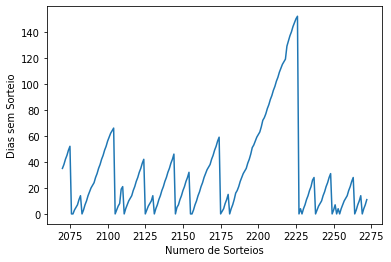

In [406]:
# grafico de dias sem sorteio por jogos ultimos 100 jogos

from matplotlib import pyplot as plt
coluna = 'bola_39_dias_sem_sorteio'
x = mega_sena[coluna][2070:].index
y = list(mega_sena[coluna][2070:])

plt.xlabel("Numero de Sorteios")
plt.ylabel("Dias sem Sorteio")
plt.plot(x,y)
plt.show

In [312]:
mega_sena['Data']

0       11/03/1996
1       18/03/1996
2       25/03/1996
3       01/04/1996
4       08/04/1996
5       15/04/1996
6       22/04/1996
7       29/04/1996
8       06/05/1996
9       13/05/1996
10      20/05/1996
11      27/05/1996
12      03/06/1996
13      10/06/1996
14      17/06/1996
15      24/06/1996
16      01/07/1996
17      08/07/1996
18      15/07/1996
19      22/07/1996
20      29/07/1996
21      05/08/1996
22      12/08/1996
23      19/08/1996
24      25/08/1996
25      01/09/1996
26      08/09/1996
27      15/09/1996
28      22/09/1996
29      29/09/1996
30      06/10/1996
31      13/10/1996
32      20/10/1996
33      27/10/1996
34      03/11/1996
35      10/11/1996
36      17/11/1996
37      24/11/1996
38      01/12/1996
39      08/12/1996
40      15/12/1996
41      22/12/1996
42      29/12/1996
43      05/01/1997
44      12/01/1997
45      19/01/1997
46      26/01/1997
47      02/02/1997
48      09/02/1997
49      16/02/1997
50      23/02/1997
51      02/03/1997
52      09/0

In [297]:
mega_sena['jogos']

0         [4, 5, 30, 33, 41, 52]
1        [9, 37, 39, 41, 43, 49]
2       [10, 11, 29, 30, 36, 47]
3          [1, 5, 6, 27, 42, 59]
4          [1, 2, 6, 16, 19, 46]
5        [7, 13, 19, 22, 40, 47]
6         [3, 5, 20, 21, 38, 56]
7        [4, 17, 37, 38, 47, 53]
8        [8, 43, 54, 55, 56, 60]
9        [4, 18, 21, 25, 38, 57]
10      [15, 25, 37, 38, 58, 59]
11       [4, 16, 19, 20, 27, 43]
12      [18, 32, 47, 50, 54, 56]
13       [2, 16, 23, 27, 47, 53]
14      [12, 33, 35, 51, 52, 60]
15      [20, 32, 34, 49, 58, 60]
16       [6, 10, 13, 19, 20, 51]
17      [23, 27, 36, 37, 42, 56]
18       [5, 10, 12, 24, 25, 60]
19      [11, 25, 28, 30, 33, 51]
20       [6, 33, 36, 46, 49, 53]
21        [1, 9, 31, 38, 46, 56]
22      [17, 37, 39, 51, 52, 59]
23        [1, 8, 14, 28, 33, 43]
24      [24, 43, 50, 54, 55, 56]
25      [10, 22, 50, 53, 57, 58]
26      [13, 17, 20, 33, 44, 51]
27        [3, 6, 22, 24, 54, 60]
28        [3, 8, 14, 43, 56, 58]
29       [7, 14, 15, 29, 38, 50]
30      [1

In [268]:
pd.set_option("display.max_row", 3000)
mega_sena[["jogos", "entre_1_e_10", "entre_11_e_20", "entre_21_e_30",
           "entre_31_e_40", "entre_41_e_50", "entre_51_e_60"]]


,jogos,entre_1_e_10,entre_11_e_20,entre_21_e_30,entre_31_e_40,entre_41_e_50,entre_51_e_60
0,"[4, 5, 30, 33, 41, 52]",2,0,1,1,1,1
1,"[9, 37, 39, 41, 43, 49]",1,0,0,2,3,0
2,"[10, 11, 29, 30, 36, 47]",1,1,2,1,1,0
3,"[1, 5, 6, 27, 42, 59]",3,0,1,0,1,1
4,"[1, 2, 6, 16, 19, 46]",3,2,0,0,1,0
5,"[7, 13, 19, 22, 40, 47]",1,2,1,1,1,0
6,"[3, 5, 20, 21, 38, 56]",2,1,1,1,0,1
7,"[4, 17, 37, 38, 47, 53]",1,1,0,2,1,1
8,"[8, 43, 54, 55, 56, 60]",1,0,0,0,1,4
9,"[4, 18, 21, 25, 38, 57]",1,1,2,1,0,1


In [163]:
mega_sena[(mega_sena["entre_1_e_10"] == 1) | (mega_sena["entre_1_e_10"] == 0)]["entre_11_e_20"].value_counts()

1    715
0    474
2    380
3     95
4     12
Name: entre_11_e_20, dtype: int64

In [263]:
mega_sena['jogos_string'].value_counts()

[11, 13, 14, 27, 44, 56]    1
[2, 7, 17, 34, 41, 50]      1
[7, 8, 18, 39, 43, 52]      1
[5, 9, 24, 27, 33, 46]      1
[6, 15, 19, 24, 31, 32]     1
                           ..
[15, 36, 45, 51, 52, 59]    1
[23, 26, 28, 36, 42, 49]    1
[8, 10, 13, 39, 54, 56]     1
[8, 27, 37, 42, 53, 56]     1
[3, 27, 36, 39, 40, 43]     1
Name: jogos_string, Length: 2273, dtype: int64

In [365]:
(mega_sena['pandas_data'].iloc[2239] - mega_sena['pandas_data'].iloc[2216]).days

81

In [ ]:
TODO:
    
só saem jogos unicos, nao saem repetidos

fazer conta da proximidade entre os numeros sorteados e plotar o grafico

verificar media, soma e desvio padrao dos jogos (plotar grafico)

plotar grafico de bolas juntas -> dias sem sorteio (sorteios ja acontecidos)

